In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from simulate_groups import simulate_cov_groups, simulate_ll

%load_ext autoreload
%autoreload 2

### Simulate data with block covariance structure

Text(0.5, 1, 'Covariance matrix')

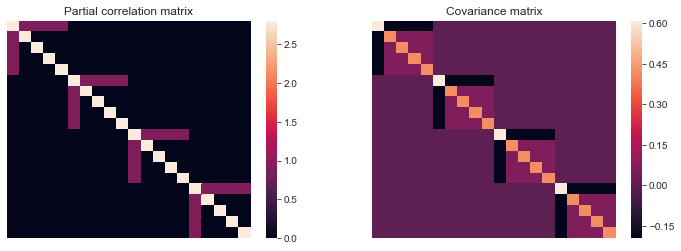

In [2]:
theta_1, sigma_1 = simulate_cov_groups(20, 4)

sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Partial correlation matrix')
sns.heatmap(sigma_1, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Covariance matrix')

In [3]:
n = 1000
p = theta_1.shape[0]

# sample some data from MVN with the given covariance matrix
X = np.random.multivariate_normal(mean=np.zeros(p),
                                  cov=sigma_1,
                                  size=(n,),
                                  check_valid='warn')

# calculate covariance/precision matrix from data
sigma_hat = np.cov(X, rowvar=False)
theta_hat = np.linalg.inv(sigma_hat)

In [4]:
sns.set({'figure.figsize': (12, 4)})
fig, axarr = plt.subplots(1, 2)

# high/low diagonal values can skew the plot, so just bound them
theta_1[theta_1 > 1] = 1
theta_1[theta_1 < 0] = 0
theta_hat[theta_hat > 1] = 1
theta_hat[theta_hat < 0] = 0

sns.heatmap(theta_1, ax=axarr[0])
axarr[0].get_xaxis().set_visible(False)
axarr[0].get_yaxis().set_visible(False)
axarr[0].set_title('Input partial correlation matrix')
sns.heatmap(theta_hat, ax=axarr[1])
axarr[1].get_xaxis().set_visible(False)
axarr[1].get_yaxis().set_visible(False)
axarr[1].set_title('Partial correlations estimated from data')

### Simulate labels from data

In [18]:
X, y, pis, is_correlated = simulate_ll(10, 100, 0.0, 4, s
print(X[:5, :5])

[[-0.38535146  0.32474421  0.11335919  0.00631544 -0.16120265]
 [-0.06085883 -0.39867252  0.25686915 -0.39049982 -0.13949537]
 [-0.01153978 -0.14751811 -0.05053739 -0.12523035 -0.26560903]
 [ 0.297419    0.40099313 -0.05391401 -0.03994211  0.50045906]
 [-0.26572235  0.24060383 -0.20802245  0.23825747  0.11198087]]


In [19]:
print(np.count_nonzero(y) / y.shape[0])
print(y)

0.5
[0 0 0 0 1 1 1 0 1 1]


In [20]:
print(pis)

[[9.28064269e-07]
 [9.42179093e-05]
 [2.19527573e-03]
 [5.38384637e-01]
 [9.98677708e-01]
 [9.98148440e-01]
 [9.81286718e-01]
 [1.12057885e-03]
 [9.99923889e-01]
 [2.86821769e-01]]
